<a href="https://colab.research.google.com/github/harshalkumeriya/Deep-Learning-using-Tensorflow/blob/master/ANN_Regressor_(housing)_using_keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing()


In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df.data, df.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
X_train_full.shape

(15480, 8)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
# Using Sequential API

In [7]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [8]:
# ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, 
# by default at the end of each epoch
# if save_best_only=True then it will only save your model,
# when its performance on the validation set is the best so far while training.
check_point = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

# EarlyStopping callback will interrupt training when it measures no progress
# on the validation set for a number of epochs (defined by the patience argument)
# and it will optionally roll back to the best model
early_stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

In [9]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_valid, y_valid), 
                    callbacks = [check_point, early_stopping], 
                    epochs = 100, 
                    use_multiprocessing = True)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8213 - val_loss: 0.5878
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5017
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4926 - val_loss: 0.4784
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4759 - val_loss: 0.4601
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4544 - val_loss: 0.4517
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4397 - val_loss: 0.4503
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4525 - val_loss: 0.4284
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4556 - val_loss: 0.4281
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4200 - val_loss: 0.4175
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4130 - val_lo

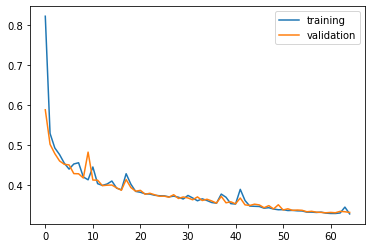

In [10]:
plt.plot(history.history['loss'], label = "training")
plt.plot(history.history['val_loss'], label = "validation")
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3424


0.3423634171485901

In [12]:
model.save("my_model.h5")

In [13]:
X_new = X_test[:3]

In [14]:
trained_model = keras.models.load_model("my_model.h5")
trained_model.predict(X_new)

array([[2.6334891],
       [2.6142786],
       [1.4038916]], dtype=float32)

In [15]:
y_test[:3]

array([1.375, 2.54 , 1.58 ])